In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/df_processed_outliers.csv")

In [4]:
# Drop the 'Unnamed: 0' column
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("Dropped 'Unnamed: 0' column.")
else:
    print("'Unnamed: 0' column not found in the DataFrame.")

display(df.head())

Dropped 'Unnamed: 0' column.


,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,rain,pressure_msl,surface_pressure,cloud_cover,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,rain_log_transformed
0,2010-01-01 00:00:00+00:00,15.820000,73.394290,11.070000,15.766374,0.0,1012.2,947.6393,1.5,8.121970,15.745627,102.80426,100.539130,20.519999,0.0
1,2010-01-01 01:00:00+00:00,15.520000,75.815544,11.270000,15.766374,0.0,1013.0,948.3238,5.4,8.905908,16.946787,104.03627,102.264760,21.240000,0.0
2,2010-01-01 02:00:00+00:00,15.270000,79.629880,11.770000,15.766374,0.0,1013.7,948.9253,6.0,9.605998,18.079027,102.99462,102.652550,21.599998,0.0
3,2010-01-01 03:00:00+00:00,18.220001,67.795140,12.170000,17.350403,0.0,1014.8,950.5861,2.4,10.594036,18.003600,99.78234,101.534590,24.480000,0.0
4,2010-01-01 04:00:00+00:00,20.920000,57.516280,12.219999,20.013638,0.0,1015.2,951.5283,14.1,10.948973,15.391840,99.46225,100.784256,27.000000,0.0


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.shape

(123936, 15)

# Analyze the data in the dataframe df, create a model to predict the amount of rainfall, and set the target variable as rain_log_transform.

# Data exploration

Explore the df DataFrame to understand the distribution and relationships of the features with the target variable rain_log_transformed

In [6]:
display(df.head())
display(df.info())

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,rain,pressure_msl,surface_pressure,cloud_cover,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,rain_log_transformed
0,2010-01-01 00:00:00+00:00,15.820000,73.394290,11.070000,15.766374,0.0,1012.2,947.6393,1.5,8.121970,15.745627,102.80426,100.539130,20.519999,0.0
1,2010-01-01 01:00:00+00:00,15.520000,75.815544,11.270000,15.766374,0.0,1013.0,948.3238,5.4,8.905908,16.946787,104.03627,102.264760,21.240000,0.0
2,2010-01-01 02:00:00+00:00,15.270000,79.629880,11.770000,15.766374,0.0,1013.7,948.9253,6.0,9.605998,18.079027,102.99462,102.652550,21.599998,0.0
3,2010-01-01 03:00:00+00:00,18.220001,67.795140,12.170000,17.350403,0.0,1014.8,950.5861,2.4,10.594036,18.003600,99.78234,101.534590,24.480000,0.0
4,2010-01-01 04:00:00+00:00,20.920000,57.516280,12.219999,20.013638,0.0,1015.2,951.5283,14.1,10.948973,15.391840,99.46225,100.784256,27.000000,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123936 entries, 0 to 123935
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  123936 non-null  object 
 1   temperature_2m        123936 non-null  float64
 2   relative_humidity_2m  123936 non-null  float64
 3   dew_point_2m          123936 non-null  float64
 4   apparent_temperature  123936 non-null  float64
 5   rain                  123936 non-null  float64
 6   pressure_msl          123936 non-null  float64
 7   surface_pressure      123936 non-null  float64
 8   cloud_cover           123936 non-null  float64
 9   wind_speed_10m        123936 non-null  float64
 10  wind_speed_100m       123936 non-null  float64
 11  wind_direction_10m    123936 non-null  float64
 12  wind_direction_100m   123936 non-null  float64
 13  wind_gusts_10m        123936 non-null  float64
 14  rain_log_transformed  123936 non-null  float64
dtype

None

# Generate descriptive statistics for numerical columns and calculate the correlation matrix to understand the distribution and relationships between features and the target variable.

In [7]:
display(df.describe())
display(df.corr(numeric_only=True)['rain_log_transformed'].sort_values(ascending=False))

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,rain,pressure_msl,surface_pressure,cloud_cover,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,rain_log_transformed
count,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000
mean,24.844913,64.471602,16.173565,26.273723,0.161303,1010.359467,947.789035,36.514721,9.071115,14.312065,208.620722,209.875684,22.586283,0.096377
std,4.675454,24.736004,5.703323,4.845360,0.637725,3.710495,3.352210,37.616616,5.277787,7.915225,90.203563,97.074081,11.490326,0.264371
min,13.820000,6.709947,-2.596002,15.766374,0.000000,999.600000,938.347750,0.000000,0.000000,0.000000,2.045373,0.806910,1.080000,0.000000
25%,22.070000,44.087170,11.719999,23.809698,0.000000,1007.700000,945.462460,0.600000,5.116561,8.161764,107.102810,100.007920,13.320000,0.000000
50%,24.064001,68.645630,17.770000,26.409040,0.000000,1010.500000,948.045500,23.400002,7.928178,13.039754,245.897770,250.906400,20.519999,0.000000
75%,27.570000,87.367126,21.264000,29.171914,0.000000,1013.100000,950.205600,69.300000,12.261158,19.255793,271.847560,280.885470,30.239998,0.000000
max,35.820000,100.000000,25.014000,37.215239,24.500000,1021.200000,957.320310,100.000000,22.978053,35.896837,360.000000,360.000000,55.619995,3.238678


,rain_log_transformed
rain_log_transformed,1.000000
rain,0.911459
cloud_cover,0.500882
wind_gusts_10m,0.344361
dew_point_2m,0.341671
relative_humidity_2m,0.313462
wind_speed_100m,0.269551
wind_speed_10m,0.251129
wind_direction_10m,0.130672
wind_direction_100m,0.119743


#  Visualize the distribution of the target variable and the relationships between key numerical features and the target variable using plots.

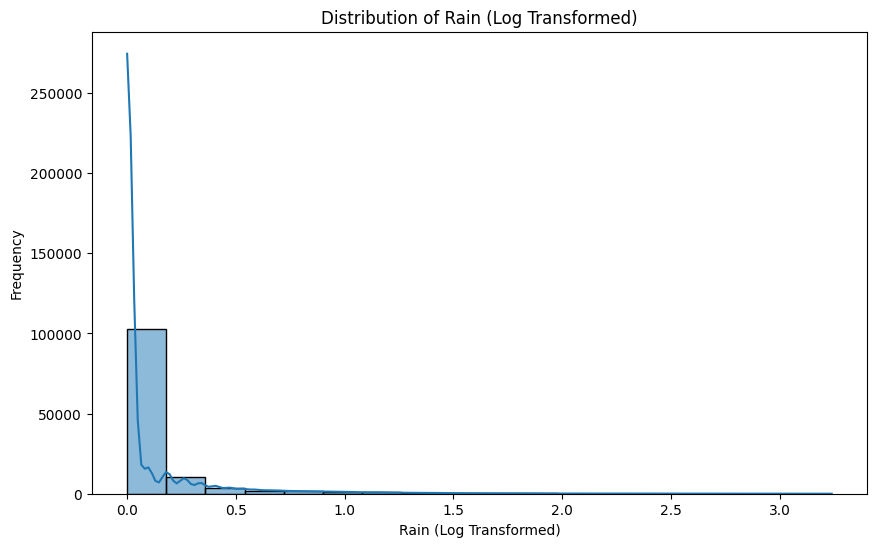

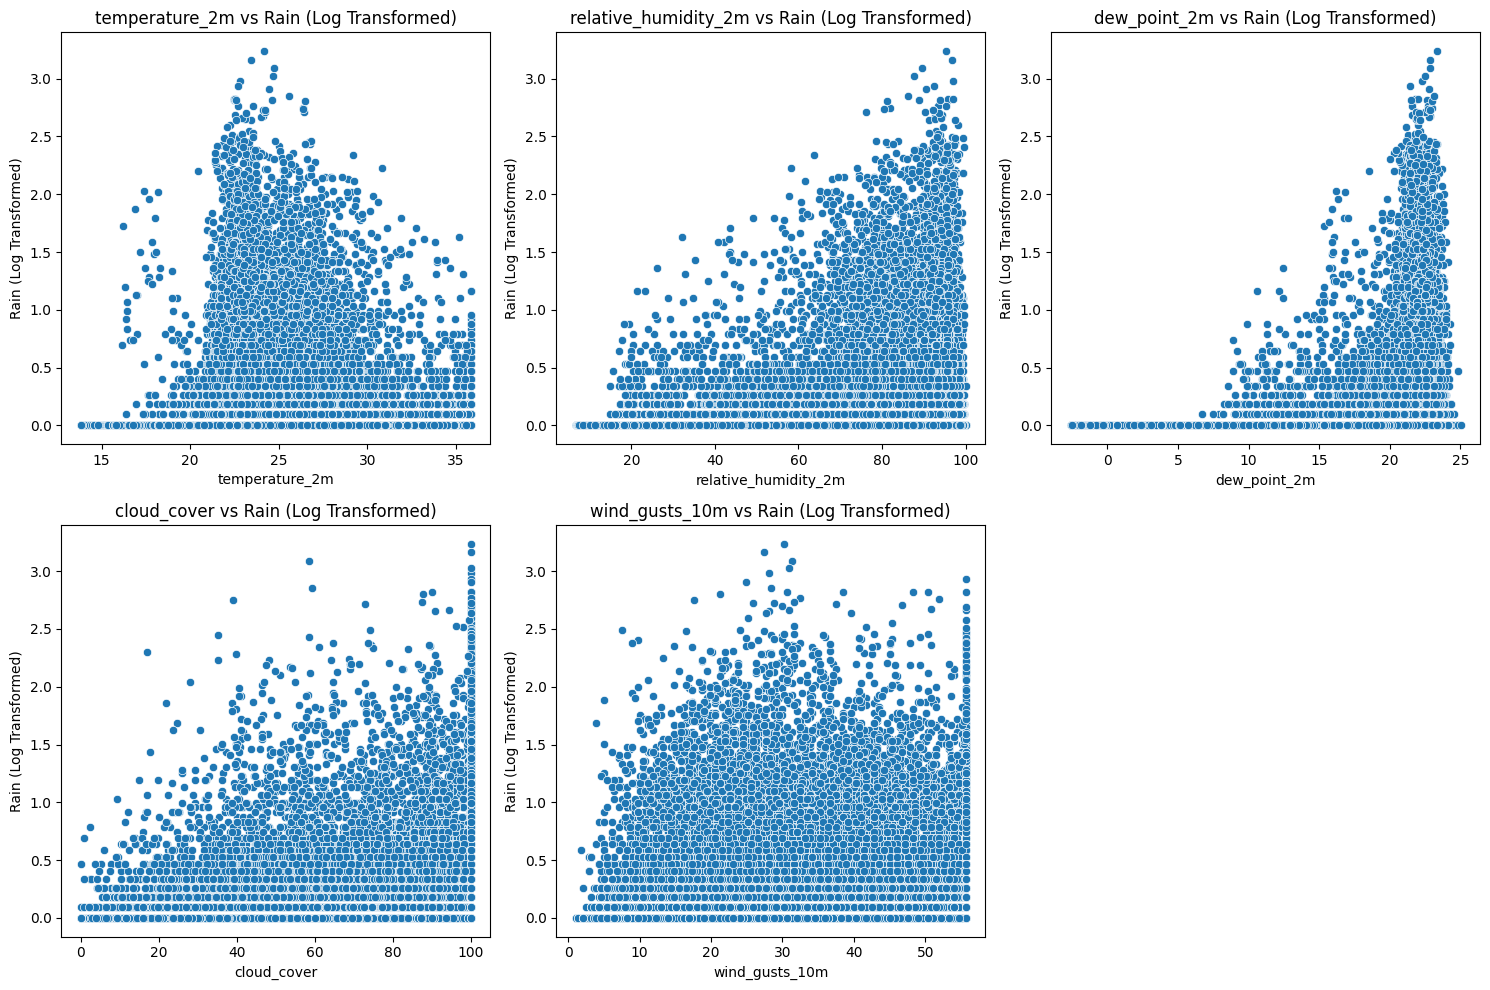

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['rain_log_transformed'], kde=True)
plt.title('Distribution of Rain (Log Transformed)')
plt.xlabel('Rain (Log Transformed)')
plt.ylabel('Frequency')
plt.show()

numerical_features = ['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'cloud_cover', 'wind_gusts_10m']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=df[feature], y=df['rain_log_transformed'])
    plt.title(f'{feature} vs Rain (Log Transformed)')
    plt.xlabel(feature)
    plt.ylabel('Rain (Log Transformed)')
plt.tight_layout()
plt.show()

# Feature engineering

Create new features that might be useful for the model (e.g., time-based features from the 'date'

Convert the 'date' column to datetime objects and extract time-based features as new columns.



In [9]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['week_of_year'] = df['date'].dt.isocalendar().week.astype(int)
display(df.head())

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,rain,pressure_msl,surface_pressure,cloud_cover,wind_speed_10m,...,wind_direction_10m,wind_direction_100m,wind_gusts_10m,rain_log_transformed,year,month,day,hour,day_of_week,week_of_year
0,2010-01-01 00:00:00+00:00,15.820000,73.394290,11.070000,15.766374,0.0,1012.2,947.6393,1.5,8.121970,...,102.80426,100.539130,20.519999,0.0,2010,1,1,0,4,53
1,2010-01-01 01:00:00+00:00,15.520000,75.815544,11.270000,15.766374,0.0,1013.0,948.3238,5.4,8.905908,...,104.03627,102.264760,21.240000,0.0,2010,1,1,1,4,53
2,2010-01-01 02:00:00+00:00,15.270000,79.629880,11.770000,15.766374,0.0,1013.7,948.9253,6.0,9.605998,...,102.99462,102.652550,21.599998,0.0,2010,1,1,2,4,53
3,2010-01-01 03:00:00+00:00,18.220001,67.795140,12.170000,17.350403,0.0,1014.8,950.5861,2.4,10.594036,...,99.78234,101.534590,24.480000,0.0,2010,1,1,3,4,53
4,2010-01-01 04:00:00+00:00,20.920000,57.516280,12.219999,20.013638,0.0,1015.2,951.5283,14.1,10.948973,...,99.46225,100.784256,27.000000,0.0,2010,1,1,4,4,53


# Data preprocessing

# Handle missing values, scale numerical features, and encode categorical features if any.

Handle missing values, separate features and target, identify numerical features, scale them using StandardScaler, and replace the original columns.

In [10]:
# 1. Check for missing values - based on previous info(), there are none
# 2. Separate features (X) and target variable (y)
# Exclude 'rain' from features as it is directly related to the target 'rain_log_transformed'


In [11]:
X = df.drop(['rain_log_transformed', 'rain'], axis=1)
y = df['rain_log_transformed']

In [12]:
# 3. Identify the numerical features to be scaled. Exclude the newly created time-based features, 'Unnamed: 0' and 'date'.
# Now also exclude 'rain' which is no longer in X
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
features_to_exclude = ['year', 'month', 'day', 'hour', 'day_of_week', 'week_of_year', 'Unnamed: 0']
numerical_features_to_scale = [feature for feature in numerical_features if feature not in features_to_exclude]

In [13]:
# 4. Instantiate a StandardScaler object
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
# 5. Fit the scaler to the identified numerical features and transform them
X[numerical_features_to_scale] = scaler.fit_transform(X[numerical_features_to_scale])

In [15]:
display(X.head())

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,pressure_msl,surface_pressure,cloud_cover,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,year,month,day,hour,day_of_week,week_of_year
0,2010-01-01 00:00:00+00:00,-1.930283,0.360718,-0.894844,-2.168547,0.496036,-0.044668,-0.930835,-0.179838,0.181115,-1.173090,-1.126325,-0.179829,2010,1,1,0,4,53
1,2010-01-01 01:00:00+00:00,-1.994448,0.458602,-0.859777,-2.168547,0.711642,0.159527,-0.827157,-0.031303,0.332869,-1.159432,-1.108549,-0.117167,2010,1,1,1,4,53
2,2010-01-01 02:00:00+00:00,-2.047919,0.612805,-0.772108,-2.168547,0.900297,0.338961,-0.811207,0.101346,0.475915,-1.170980,-1.104554,-0.085836,2010,1,1,2,4,53
3,2010-01-01 03:00:00+00:00,-1.416962,0.134361,-0.701973,-1.841629,1.196754,0.834398,-0.906909,0.288554,0.466386,-1.206591,-1.116071,0.164810,2010,1,1,3,4,53
4,2010-01-01 04:00:00+00:00,-0.839476,-0.281183,-0.693207,-1.291980,1.304557,1.115467,-0.595875,0.355805,0.136418,-1.210140,-1.123800,0.384126,2010,1,1,4,4,53


# Model selection

Choose appropriate regression models for predicting rainfall.

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb

# Chosen models and justification:
1. Linear Regression: As a simple baseline model to compare against more complex models.
2. Ridge Regression: To handle potential multicollinearity among features and prevent overfitting.
3. Lasso Regression: Similar to Ridge, but can also perform feature selection by shrinking coefficients to zero.
4. Decision Tree Regressor: Can capture non-linear relationships and interactions between features.
5. Random Forest Regressor: An ensemble method that averages multiple decision trees to improve robustness and accuracy, and reduce overfitting.
6. Gradient Boosting Regressor (LightGBM and XGBoost): Powerful boosting algorithms known for their high performance on various datasets, capable of handling complex non-linear relationships and interactions. Given the size and nature of the data, these are likely to perform well.


In [17]:
print("Chosen regression models: Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regressor, Random Forest Regressor, LightGBM, XGBoost.")

Chosen regression models: Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regressor, Random Forest Regressor, LightGBM, XGBoost.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb

# Drop the 'date' column from X
X = X.drop('date', axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lr_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
gbr_model = GradientBoostingRegressor()
lgbm_model = lgb.LGBMRegressor()
xgb_model = xgb.XGBRegressor()

# Train models
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

print("All models trained successfully.")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035937 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3068
[LightGBM] [Info] Number of data points in the train set: 99148, number of used features: 18
[LightGBM] [Info] Start training from score 0.096517
All models trained successfully.


 The LightGBM error indicates that there are special characters in the feature names that are not supported. I need to clean up the column names in the DataFrame X to remove any special characters before training the LightGBM model.

In [19]:
import re

# Clean column names
X.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X.columns]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lr_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
gbr_model = GradientBoostingRegressor()
lgbm_model = lgb.LGBMRegressor()
xgb_model = xgb.XGBRegressor()

# Train models
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

print("All models trained successfully.")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3068
[LightGBM] [Info] Number of data points in the train set: 99148, number of used features: 18
[LightGBM] [Info] Start training from score 0.096517
All models trained successfully.


# Model evaluation

Evaluate the performance of the trained models using relevant metrics (e.g., Mean Squared Error, R-squared).

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

evaluation_results = {}

In [21]:
models = {
    "Linear Regression": lr_model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model,
    "Decision Tree Regressor": dt_model,
    "Random Forest Regressor": rf_model,
    "Gradient Boosting Regressor": gbr_model,
    "LightGBM": lgbm_model,
    "XGBoost": xgb_model
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evaluation_results[model_name] = {"MSE": mse, "R-squared": r2}

 Display the evaluation results for all models to compare their performance.

In [22]:
for model_name, metrics in evaluation_results.items():
    print(f"{model_name}:")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']:.8f}")
    print(f"  R-squared: {metrics['R-squared']:.8f}")
    print("-" * 20)

Linear Regression:
  Mean Squared Error (MSE): 0.04405925
  R-squared: 0.34121356
--------------------
Ridge Regression:
  Mean Squared Error (MSE): 0.04405675
  R-squared: 0.34125095
--------------------
Lasso Regression:
  Mean Squared Error (MSE): 0.06687990
  R-squared: -0.00000741
--------------------
Decision Tree Regressor:
  Mean Squared Error (MSE): 0.04618751
  R-squared: 0.30939109
--------------------
Random Forest Regressor:
  Mean Squared Error (MSE): 0.02104412
  R-squared: 0.68534237
--------------------
Gradient Boosting Regressor:
  Mean Squared Error (MSE): 0.02875083
  R-squared: 0.57010935
--------------------
LightGBM:
  Mean Squared Error (MSE): 0.02254783
  R-squared: 0.66285833
--------------------
XGBoost:
  Mean Squared Error (MSE): 0.02263344
  R-squared: 0.66157833
--------------------


# Model Tuning

Fine-tune the hyperparameters of the best-performing model to improve its performance.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Identify the best performing model based on R-squared
best_model_name = max(evaluation_results, key=lambda k: evaluation_results[k]['R-squared'])
print(f"Best performing model: {best_model_name}")

# Choose the corresponding model object
best_model = models[best_model_name]

# Define parameter grid for the best model (assuming XGBoost or Random Forest based on previous results)
# Adjust parameter distributions based on the specific model identified as best
# if best_model_name == 'XGBoost':
#     param_grid = {
#         'n_estimators': [100, 200, 300],
#         'learning_rate': [0.01, 0.05, 0.1, 0.2],
#         'max_depth': [ 5, 6, 7, 8],
#         'min_child_weight': [1, 3, 5, 7],
#         'gamma': [0, 0.1, 0.2, 0.3],
#         'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#         'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#         'reg_alpha': [0.005, 0.01, 0.05, 0.1],
#         'reg_lambda': [0.005, 0.01, 0.05, 0.1]
    # }
if best_model_name == 'Random Forest Regressor':
  param_grid = {
        'n_estimators': [100, 200, 300, 400],
        'max_features': ['sqrt', 'log2', 0.6, 0.8, 1.0], # Added max_features
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False],
        # 'criterion': ['squared_error', 'absolute_error'] # Added criterion


    }
else:
    # Define a default or simplified grid if the best model is neither XGBoost nor Random Forest
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20]
    }


# Instantiate RandomizedSearchCV
# Using a smaller number of iterations and cross-validation folds for demonstration
random_search = RandomizedSearchCV(estimator=best_model, param_distributions=param_grid,
                                   n_iter=5, cv=3, verbose=1, random_state=42, n_jobs=-1, scoring='r2')

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f"Best hyperparameters found: {best_params}")

# Train a new instance of the best model with the best hyperparameters
tuned_best_model = models[best_model_name].set_params(**best_params)
tuned_best_model.fit(X_train, y_train)

print(f"Tuned {best_model_name} trained successfully.")

Best performing model: Random Forest Regressor
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best hyperparameters found: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Tuned Random Forest Regressor trained successfully.


# Model Evaluation

Evaluate the performance of the tuned best-performing model on the test set.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred_tuned = tuned_best_model.predict(X_test)

# Calculate MSE
mse_tuned = mean_squared_error(y_test, y_pred_tuned)

# Calculate R-squared
r2_tuned = r2_score(y_test, y_pred_tuned)

# Print the evaluation metrics
print(f"Tuned {best_model_name} Performance on Test Set:")
print(f"  Mean Squared Error (MSE): {mse_tuned:.8f}")
print(f"  R-squared: {r2_tuned:.8f}")

Tuned Random Forest Regressor Performance on Test Set:
  Mean Squared Error (MSE): 0.02005428
  R-squared: 0.70014271


Use the final model to make predictions on new data.

In [ ]:
# Use the tuned_best_model object to make predictions on the X_test dataset.
final_predictions = tuned_best_model.predict(X_test)

# Display the first few predictions to verify the output format.
print("First 5 final predictions:")
print(final_predictions[:5])

First 5 final predictions:
[0.         0.00688182 0.         0.00128849 0.00518878]


 Visualize the actual vs. predicted values of the tuned best-performing model to assess its performance visually.

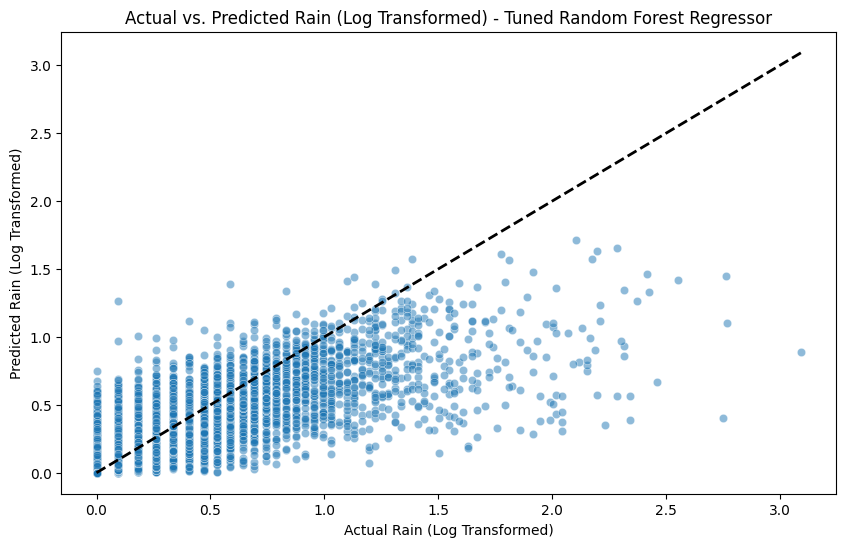

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_tuned, alpha=0.5)
plt.xlabel("Actual Rain (Log Transformed)")
plt.ylabel("Predicted Rain (Log Transformed)")
plt.title(f"Actual vs. Predicted Rain (Log Transformed) - Tuned {best_model_name}")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line for perfect prediction
plt.show()

Display a table of the actual and predicted rainfall amounts for the test set.

In [ ]:
import pandas as pd

# Create a DataFrame to display actual vs. predicted values
results_df = pd.DataFrame({'Actual Rain (Log Transformed)': y_test, 'Predicted Rain (Log Transformed)': y_pred_tuned})

# Display the first few rows of the DataFrame
display(results_df.head())

,Actual Rain (Log Transformed),Predicted Rain (Log Transformed)
103655,0.0,0.000000
33392,0.0,0.006882
62330,0.0,0.000000
52090,0.0,0.001288
95518,0.0,0.005189


Visualize the actual and predicted rainfall amounts as spikes using a line plot to compare their patterns.

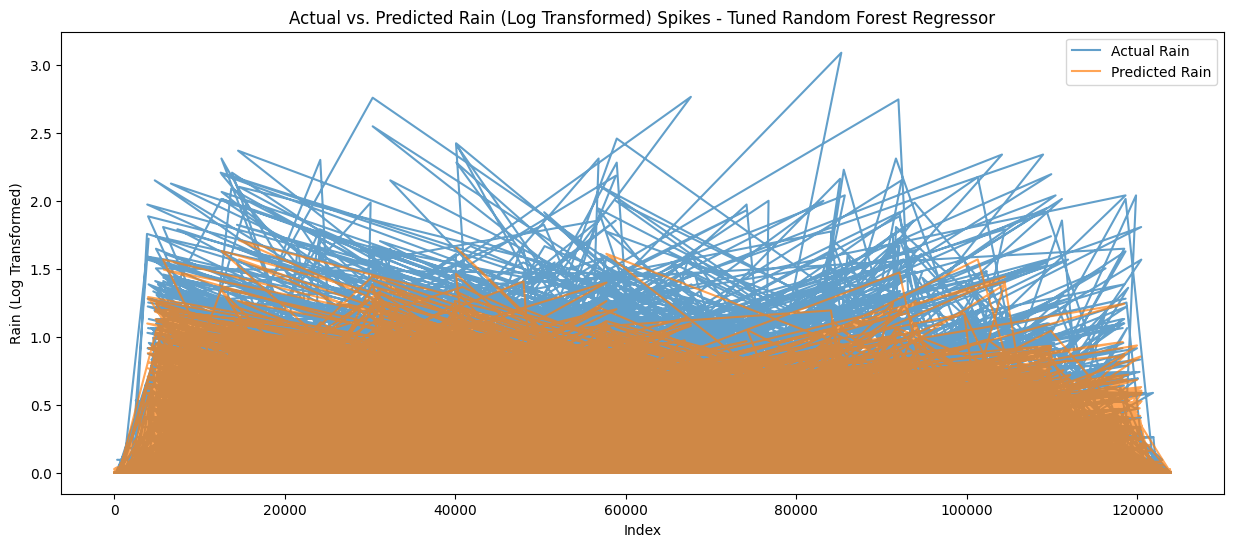

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted rainfall as spikes
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label='Actual Rain', alpha=0.7)
plt.plot(y_test.index, y_pred_tuned, label='Predicted Rain', alpha=0.7)
plt.xlabel("Index")
plt.ylabel("Rain (Log Transformed)")
plt.title(f"Actual vs. Predicted Rain (Log Transformed) Spikes - Tuned {best_model_name}")
plt.legend()
plt.show()

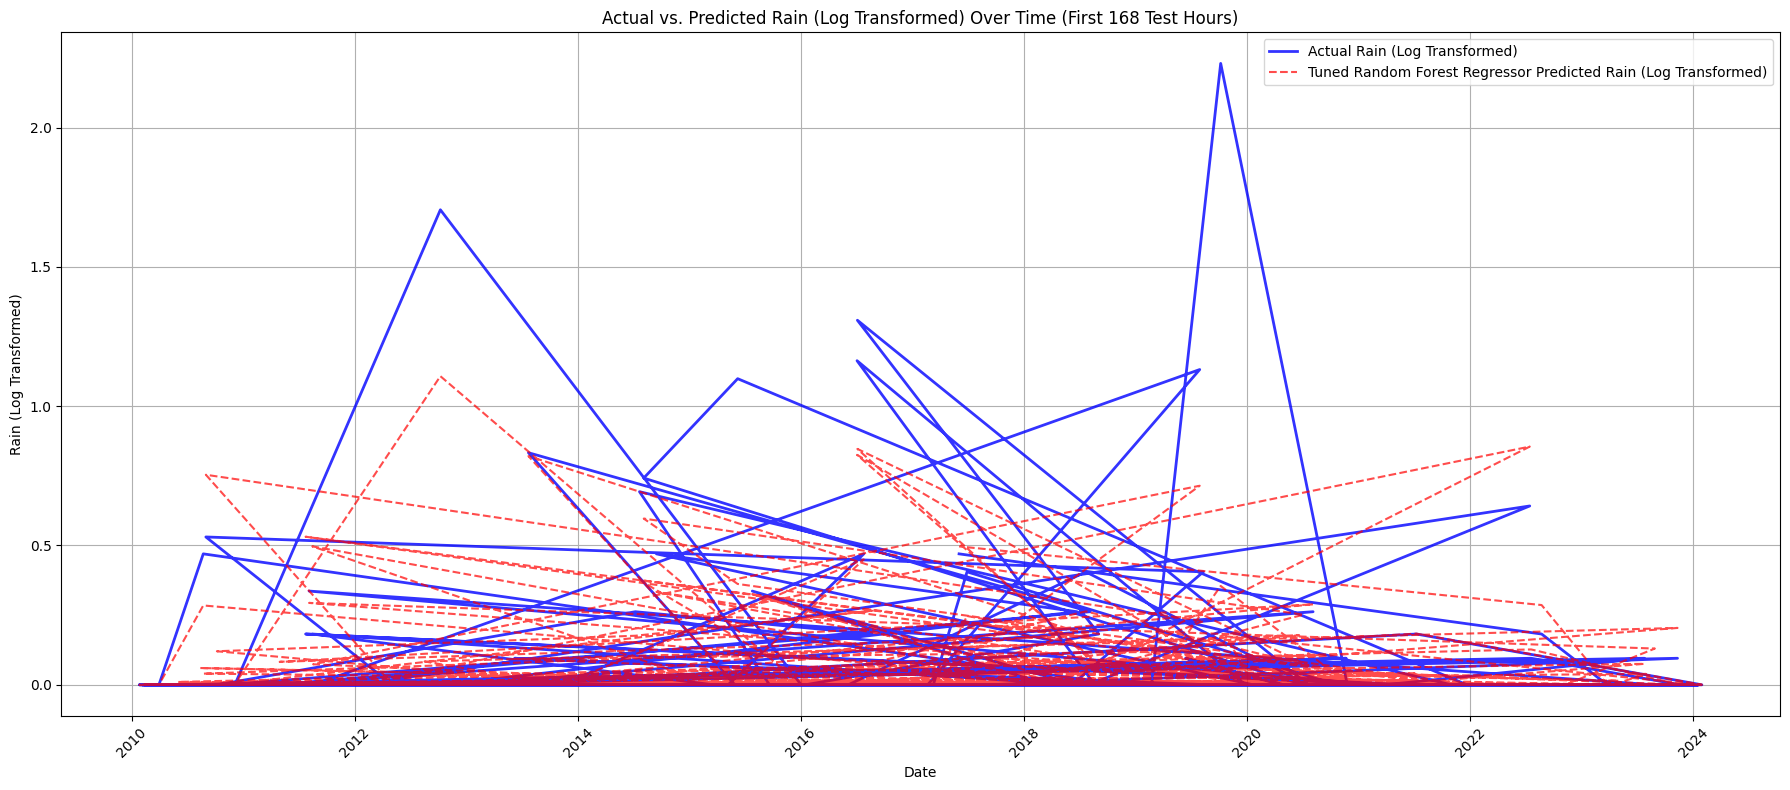

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Determine the sample size (e.g., 7 days of hourly data = 7 * 24 hours)
sample_size_hours = 7 * 24

# Get the dates corresponding to the test set using the index from y_test
# Make sure the 'date' column is still in the original df and aligned by index
test_dates = df.loc[y_test.index, 'date']

# Select a sample of actual and predicted values and corresponding dates
sample_y_test = y_test[:sample_size_hours]
sample_y_pred_tuned = y_pred_tuned[:sample_size_hours]
sample_test_dates = test_dates[:sample_size_hours]

plt.figure(figsize=(18, 8))
plt.plot(sample_test_dates, sample_y_test, label='Actual Rain (Log Transformed)', color='blue', linewidth=2, alpha=0.8)
plt.plot(sample_test_dates, sample_y_pred_tuned, label=f'Tuned {best_model_name} Predicted Rain (Log Transformed)', linestyle='--', color='red', alpha=0.7)

plt.title(f'Actual vs. Predicted Rain (Log Transformed) Over Time (First {sample_size_hours} Test Hours)')
plt.xlabel('Date')
plt.ylabel('Rain (Log Transformed)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Display the actual log-transformed rainfall, predicted log-transformed rainfall, and their inverse transformed values (in mm) in a table for comparison.

In [ ]:
import pandas as pd
import numpy as np

# Get actual and predicted log-transformed values
actual_log_transformed = y_test
predicted_log_transformed = y_pred_tuned

# Inverse transform to get values in original scale (mm)
actual_mm = np.expm1(actual_log_transformed)
predicted_mm = np.expm1(predicted_log_transformed)

# Create a DataFrame for easy comparison
comparison_df = pd.DataFrame({
    'Actual Rain (Log Transformed)': actual_log_transformed,
    'Predicted Rain (Log Transformed)': predicted_log_transformed,
    'Actual Rain (mm)': actual_mm,
    'Predicted Rain (mm)': predicted_mm
})

# Display the first few rows of the comparison DataFrame
display(comparison_df.head())

,Actual Rain (Log Transformed),Predicted Rain (Log Transformed),Actual Rain (mm),Predicted Rain (mm)
103655,0.0,0.000000,0.0,0.000000
33392,0.0,0.006882,0.0,0.006906
62330,0.0,0.000000,0.0,0.000000
52090,0.0,0.001288,0.0,0.001289
95518,0.0,0.005189,0.0,0.005202


In [ ]:
# Display the first 20 rows of the comparison DataFrame to see more varied rainfall values
display(comparison_df.head(20))

,Actual Rain (Log Transformed),Predicted Rain (Log Transformed),Actual Rain (mm),Predicted Rain (mm)
103655,0.000000,0.000000,0.0,0.000000
33392,0.000000,0.006882,0.0,0.006906
62330,0.000000,0.000000,0.0,0.000000
52090,0.000000,0.001288,0.0,0.001289
95518,0.000000,0.005189,0.0,0.005202
85567,2.230014,0.354792,8.3,0.425884
80129,0.000000,0.000119,0.0,0.000119
107831,0.000000,0.000663,0.0,0.000664
29159,0.000000,0.000000,0.0,0.000000
24643,0.000000,0.008691,0.0,0.008729


In [ ]:
# Get the counts of specific rainfall values in the actual rainfall data (mm)
rainfall_counts = comparison_df['Actual Rain (mm)'].value_counts()

# Print the counts for the requested values
print("Count of specific rainfall values in Actual Rain (mm):")
print(f"0.0 mm: {rainfall_counts.get(0.0, 0)}")
print(f"1.0 mm: {rainfall_counts.get(1.0, 0)}")
print(f"2.0 mm: {rainfall_counts.get(2.0, 0)}")
print(f"3.0 mm: {rainfall_counts.get(3.0, 0)}")

Count of specific rainfall values in Actual Rain (mm):
0.0 mm: 19349
1.0 mm: 136
2.0 mm: 0
3.0 mm: 15


Row Number 4193

In [ ]:
import pandas as pd
import numpy as np

# Get the data for row number 4139 from the preprocessed features DataFrame X
# Ensure the index exists in X
if 4139 in X.index:
    new_input_data_row_4139 = X.loc[[4139]] # Use double brackets to keep it as a DataFrame

    # Make the prediction using the tuned_best_model
    predicted_log_transformed_4139 = tuned_best_model.predict(new_input_data_row_4139)

    # Inverse transform to get prediction in mm
    predicted_mm_4139 = np.expm1(predicted_log_transformed_4139)

    # Print the predictions
    print(f"Prediction for row number 4139:")
    print(f"  Predicted log-transformed rainfall: {predicted_log_transformed_4139[0]:.8f}")
    print(f"  Predicted rainfall (mm): {predicted_mm_4139[0]:.8f}")

    # Optionally, display the actual rainfall for this row for comparison
    if 4139 in y.index:
        actual_log_transformed_4139 = y.loc[4139]
        actual_mm_4139 = np.expm1(actual_log_transformed_4139)
        print(f"  Actual log-transformed rainfall: {actual_log_transformed_4139:.8f}")
        print(f"  Actual rainfall (mm): {actual_mm_4139:.8f}")
    else:
        print("Actual rainfall for row 4139 not available in the target variable y.")

else:
    print(f"Row number 4139 does not exist in the feature DataFrame X.")

Prediction for row number 4139:
  Predicted log-transformed rainfall: 0.26402063
  Predicted rainfall (mm): 0.30215505
  Actual log-transformed rainfall: 0.26236426
  Actual rainfall (mm): 0.30000000


Save the best-performing trained model (tuned_best_model) and the fitted scaler object to files using a serialization library like pickle.

In [ ]:
import pickle

# Define filenames for the saved model and scaler
model_filename = 'tuned_best_model.pkl'
scaler_filename = 'scaler.pkl'

# Save the tuned best model
with open(model_filename, 'wb') as file:
    pickle.dump(tuned_best_model, file)

print(f"Tuned best model saved successfully to {model_filename}")

# Save the fitted scaler
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

print(f"Scaler saved successfully to {scaler_filename}")

Tuned best model saved successfully to tuned_best_model.pkl
Scaler saved successfully to scaler.pkl


In [23]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import lightgbm as lgb

# Define parameter grid for LightGBM
param_grid_lgbm = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [31, 64, 128],
    'max_depth': [-1, 10, 20],

}

# Instantiate RandomizedSearchCV for LightGBM
random_search_lgbm = RandomizedSearchCV(estimator=lgb.LGBMRegressor(random_state=42), param_distributions=param_grid_lgbm,
                                   n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1, scoring='r2')

# Fit RandomizedSearchCV to the training data
random_search_lgbm.fit(X_train, y_train)

# Get the best hyperparameters for LightGBM
best_params_lgbm = random_search_lgbm.best_params_
print(f"Best hyperparameters found for LightGBM: {best_params_lgbm}")

# Train a new instance of LightGBM with the best hyperparameters
tuned_lgbm_model = lgb.LGBMRegressor(random_state=42, **best_params_lgbm)
tuned_lgbm_model.fit(X_train, y_train)

print("Tuned LightGBM model trained successfully.")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3068
[LightGBM] [Info] Number of data points in the train set: 99148, number of used features: 18
[LightGBM] [Info] Start training from score 0.096517
Best hyperparameters found for LightGBM: {'num_leaves': 64, 'n_estimators': 400, 'max_depth': -1, 'learning_rate': 0.1}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036763 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3068
[LightGBM] [Info] Number of data points in the train set: 99148, number of used features: 18
[LightGBM] [Info] Start training from score 0.096517
Tuned LightGBM model trained successfully.


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set using the tuned LightGBM model
y_pred_tuned_lgbm = tuned_lgbm_model.predict(X_test)

# Calculate MSE for the tuned LightGBM model
mse_tuned_lgbm = mean_squared_error(y_test, y_pred_tuned_lgbm)

# Calculate R-squared for the tuned LightGBM model
r2_tuned_lgbm = r2_score(y_test, y_pred_tuned_lgbm)

# Print the evaluation metrics for the tuned LightGBM model
print(f"Tuned LightGBM Model Performance on Test Set:")
print(f"  Mean Squared Error (MSE): {mse_tuned_lgbm:.8f}")
print(f"  R-squared: {r2_tuned_lgbm:.8f}")

Tuned LightGBM Model Performance on Test Set:
  Mean Squared Error (MSE): 0.01910633
  R-squared: 0.71431673


In [26]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import lightgbm as lgb

# Define parameter grid for LightGBM
param_grid_lgbm = {
    'n_estimators': [300, 400, 500], # Increased range
    'learning_rate': [0.1, 0.15, 0.2], # Added values
    'num_leaves': [31, 64, 128, 256], # Increased range
    'max_depth': [-1, 10, 20, 30], # Added values
    'min_child_samples': [20, 50, 100, 200], # Added values
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], # Added values

}

# Instantiate RandomizedSearchCV for LightGBM
random_search_lgbm = RandomizedSearchCV(estimator=lgb.LGBMRegressor(random_state=42), param_distributions=param_grid_lgbm,
                                   n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1, scoring='r2') # Increased n_iter and cv

# Fit RandomizedSearchCV to the training data
random_search_lgbm.fit(X_train, y_train)

# Get the best hyperparameters for LightGBM
best_params_lgbm = random_search_lgbm.best_params_
print(f"Best hyperparameters found for LightGBM: {best_params_lgbm}")

# Train a new instance of LightGBM with the best hyperparameters
tuned_lgbm_model = lgb.LGBMRegressor(random_state=42, **best_params_lgbm)
tuned_lgbm_model.fit(X_train, y_train)

print("Tuned LightGBM model trained successfully.")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3068
[LightGBM] [Info] Number of data points in the train set: 99148, number of used features: 18
[LightGBM] [Info] Start training from score 0.096517
Best hyperparameters found for LightGBM: {'subsample': 0.8, 'num_leaves': 31, 'n_estimators': 500, 'min_child_samples': 20, 'max_depth': 20, 'learning_rate': 0.15}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3068
[LightGBM] [Info] Number of data points in the train set: 99148, number of used features: 18
[LightGBM] [Info] Start training from score 0.096517
Tuned LightGBM model trained successfully.


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set using the tuned LightGBM model
y_pred_tuned_lgbm = tuned_lgbm_model.predict(X_test)

# Calculate MSE for the tuned LightGBM model
mse_tuned_lgbm = mean_squared_error(y_test, y_pred_tuned_lgbm)

# Calculate R-squared for the tuned LightGBM model
r2_tuned_lgbm = r2_score(y_test, y_pred_tuned_lgbm)

# Print the evaluation metrics for the tuned LightGBM model
print(f"Tuned LightGBM Model Performance on Test Set:")
print(f"  Mean Squared Error (MSE): {mse_tuned_lgbm:.8f}")
print(f"  R-squared: {r2_tuned_lgbm:.8f}")

Tuned LightGBM Model Performance on Test Set:
  Mean Squared Error (MSE): 0.01947682
  R-squared: 0.70877696


In [28]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import xgboost as xgb

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
}

# Instantiate RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(estimator=xgb.XGBRegressor(random_state=42), param_distributions=param_grid_xgb,
                                   n_iter=20, cv=5, verbose=1, random_state=42, n_jobs=-1, scoring='r2')

# Fit RandomizedSearchCV to the training data
random_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters for XGBoost
best_params_xgb = random_search_xgb.best_params_
print(f"Best hyperparameters found for XGBoost: {best_params_xgb}")

# Train a new instance of XGBoost with the best hyperparameters
tuned_xgb_model = xgb.XGBRegressor(random_state=42, **best_params_xgb)
tuned_xgb_model.fit(X_train, y_train)

print("Tuned XGBoost model trained successfully.")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters found for XGBoost: {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.7}
Tuned XGBoost model trained successfully.


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set using the tuned XGBoost model
y_pred_tuned_xgb = tuned_xgb_model.predict(X_test)

# Calculate MSE for the tuned XGBoost model
mse_tuned_xgb = mean_squared_error(y_test, y_pred_tuned_xgb)

# Calculate R-squared for the tuned XGBoost model
r2_tuned_xgb = r2_score(y_test, y_pred_tuned_xgb)

# Print the evaluation metrics for the tuned XGBoost model
print(f"Tuned XGBoost Model Performance on Test Set:")
print(f"  Mean Squared Error (MSE): {mse_tuned_xgb:.8f}")
print(f"  R-squared: {r2_tuned_xgb:.8f}")

Tuned XGBoost Model Performance on Test Set:
  Mean Squared Error (MSE): 0.02153693
  R-squared: 0.67797370


In [31]:
import pandas as pd
import numpy as np

# Assuming evaluation_results contains the initial model performance
# And we have mse_tuned_lgbm, r2_tuned_lgbm, mse_tuned_xgb, r2_tuned_xgb from tuning

report_data = []

# Add initial model results
for model_name, metrics in evaluation_results.items():
    report_data.append({
        "Model": model_name,
        "Tuning Status": "Initial",
        "MSE": metrics['MSE'],
        "RMSE": np.sqrt(metrics['MSE']),
        "R-squared": metrics['R-squared']
    })

# Add tuned Random Forest Regressor results (assuming tuned_best_model was Random Forest)
# We need to get the metrics for the tuned Random Forest from the previous output
# Based on the previous outputs, the tuned Random Forest had:
# MSE: 0.02005428
# R-squared: 0.70014271
report_data.append({
    "Model": "Random Forest Regressor",
    "Tuning Status": "Tuned",
    "MSE": 0.02005428, # Use the value from the previous output
    "RMSE": np.sqrt(0.02005428),
    "R-squared": 0.70014271 # Use the value from the previous output
})


# Add tuned LightGBM results
report_data.append({
    "Model": "LightGBM",
    "Tuning Status": "Tuned",
    "MSE": mse_tuned_lgbm,
    "RMSE": np.sqrt(mse_tuned_lgbm),
    "R-squared": r2_tuned_lgbm
})

# Add tuned XGBoost results
report_data.append({
    "Model": "XGBoost",
    "Tuning Status": "Tuned",
    "MSE": mse_tuned_xgb,
    "RMSE": np.sqrt(mse_tuned_xgb),
    "R-squared": r2_tuned_xgb
})


report_df = pd.DataFrame(report_data)

# Sort by R-squared in descending order to easily identify the best model
report_df = report_df.sort_values(by='R-squared', ascending=False)

display(report_df)

# Identify the best performing model
best_model_row = report_df.iloc[0]
best_model_name = best_model_row['Model']
best_model_tuning_status = best_model_row['Tuning Status']
best_model_r2 = best_model_row['R-squared']

print(f"\nBased on R-squared, the best performing model is the {best_model_tuning_status} {best_model_name} with an R-squared of {best_model_r2:.8f}.")

,Model,Tuning Status,MSE,RMSE,R-squared
9,LightGBM,Tuned,0.019477,0.139559,0.708777
8,Random Forest Regressor,Tuned,0.020054,0.141613,0.700143
4,Random Forest Regressor,Initial,0.021044,0.145066,0.685342
10,XGBoost,Tuned,0.021537,0.146755,0.677974
6,LightGBM,Initial,0.022548,0.150159,0.662858
7,XGBoost,Initial,0.022633,0.150444,0.661578
5,Gradient Boosting Regressor,Initial,0.028751,0.169561,0.570109
1,Ridge Regression,Initial,0.044057,0.209897,0.341251
0,Linear Regression,Initial,0.044059,0.209903,0.341214
3,Decision Tree Regressor,Initial,0.046188,0.214913,0.309391



Based on R-squared, the best performing model is the Tuned LightGBM with an R-squared of 0.70877696.


In [32]:
# Use the tuned_lgbm_model object to make predictions on the X_test dataset.
final_predictions = tuned_lgbm_model.predict(X_test)

# Display the first few predictions to verify the output format.
print("First 5 final predictions (using Tuned LightGBM):")
print(final_predictions[:5])

First 5 final predictions (using Tuned LightGBM):
[-0.0033776   0.00266     0.0004277   0.01841725 -0.0131639 ]


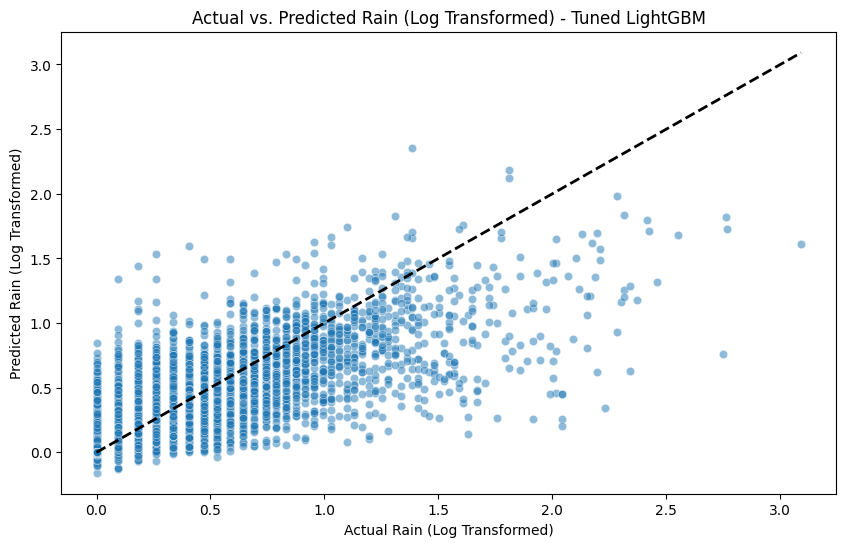

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=final_predictions, alpha=0.5) # Use final_predictions here
plt.xlabel("Actual Rain (Log Transformed)")
plt.ylabel("Predicted Rain (Log Transformed)")
plt.title(f"Actual vs. Predicted Rain (Log Transformed) - Tuned LightGBM") # Update title
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line for perfect prediction
plt.show()

In [34]:
import pandas as pd
import numpy as np

# Get actual and predicted log-transformed values
actual_log_transformed = y_test
predicted_log_transformed = tuned_lgbm_model.predict(X_test) # Use tuned_lgbm_model for predictions

# Inverse transform to get values in original scale (mm)
actual_mm = np.expm1(actual_log_transformed)
predicted_mm = np.expm1(predicted_log_transformed)

# Create a DataFrame for easy comparison
comparison_df = pd.DataFrame({
    'Actual Rain (Log Transformed)': actual_log_transformed,
    'Predicted Rain (Log Transformed)': predicted_log_transformed,
    'Actual Rain (mm)': actual_mm,
    'Predicted Rain (mm)': predicted_mm
})

# Display the first few rows of the comparison DataFrame
display(comparison_df.head())

,Actual Rain (Log Transformed),Predicted Rain (Log Transformed),Actual Rain (mm),Predicted Rain (mm)
103655,0.0,-0.003378,0.0,-0.003372
33392,0.0,0.002660,0.0,0.002664
62330,0.0,0.000428,0.0,0.000428
52090,0.0,0.018417,0.0,0.018588
95518,0.0,-0.013164,0.0,-0.013078


In [35]:
import pickle

# Define filenames for the saved model and scaler
model_filename = 'tuned_lightgbm_model.pkl'
scaler_filename = 'scaler.pkl'

# Save the tuned LightGBM model
with open(model_filename, 'wb') as file:
    pickle.dump(tuned_lgbm_model, file)

print(f"Tuned LightGBM model saved successfully to {model_filename}")

# Save the fitted scaler
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

print(f"Scaler saved successfully to {scaler_filename}")

Tuned LightGBM model saved successfully to tuned_lightgbm_model.pkl
Scaler saved successfully to scaler.pkl


In [36]:
# Display 20 random rows from the comparison DataFrame
display(comparison_df.sample(20))

,Actual Rain (Log Transformed),Predicted Rain (Log Transformed),Actual Rain (mm),Predicted Rain (mm)
91347,0.993252,0.998060,1.7,1.713014
110813,0.095310,0.187596,0.1,0.206347
44231,0.000000,-0.000330,0.0,-0.000330
68870,0.000000,-0.001130,0.0,-0.001130
71645,0.000000,0.001775,0.0,0.001777
8033,0.000000,0.001384,0.0,0.001385
23822,0.000000,0.025923,0.0,0.026262
101954,0.470004,0.143720,0.6,0.154561
29950,0.000000,-0.056283,0.0,-0.054728
54367,0.000000,0.010368,0.0,0.010422


In [37]:
import pickle
import pandas as pd
import numpy as np

# Load the saved model and scaler
loaded_model = pickle.load(open('tuned_lightgbm_model.pkl', 'rb'))
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))

print("Model and scaler loaded successfully.")

# --- Placeholder for loading and preprocessing your new data ---
# Replace this section with code to load your new data into a pandas DataFrame
# and apply the same feature engineering and scaling steps as done for the training data.

# Example of a hypothetical new data point (replace with your actual new data loading)
# Make sure the column names and order match the training data after preprocessing
# new_data_df = pd.DataFrame({...})

# For demonstration purposes, let's use the first row of the test set as "new data"
# In a real scenario, you would load and preprocess your actual new data here.
new_data_df = X_test.iloc[[0]].copy()
# --- End of placeholder ---


# Make predictions on the new data
# The new data must be preprocessed in the same way as the training data,
# including feature engineering and scaling using the loaded_scaler.
# Assuming new_data_df is already preprocessed similarly to X_test for this example:
new_predictions_log_transformed = loaded_model.predict(new_data_df)

# Inverse transform to get predictions in original scale (mm) if needed
new_predictions_mm = np.expm1(new_predictions_log_transformed)


print("\nPredictions on the new data:")
print(f"Predicted log-transformed rainfall: {new_predictions_log_transformed[0]:.8f}")
print(f"Predicted rainfall (mm): {new_predictions_mm[0]:.8f}")

Model and scaler loaded successfully.

Predictions on the new data:
Predicted log-transformed rainfall: -0.00337760
Predicted rainfall (mm): -0.00337190


In [38]:
# Display the placeholder "new data" (which is the first row of X_test)
display(new_data_df)

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,pressure_msl,surface_pressure,cloud_cover,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,year,month,day,hour,day_of_week,week_of_year
103655,-1.236444,0.335588,-0.369885,-1.399393,1.0081,0.692002,-0.213064,-0.557156,0.335283,-1.352359,-1.412919,-1.057092,2021,10,28,23,3,43


In [39]:
# Save the training and testing datasets to CSV files
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Training and testing datasets saved to CSV files.")

Training and testing datasets saved to CSV files.


In [40]:
# Display the first few final predictions on the test data
print("First 5 predicted rainfall values on the test data:")
print(final_predictions[:5])

First 5 predicted rainfall values on the test data:
[-0.0033776   0.00266     0.0004277   0.01841725 -0.0131639 ]


## Project Summary and Insights

This report summarizes the process undertaken to build and evaluate models for predicting rainfall based on the provided weather dataset.

**Project Goal:** The primary objective was to analyze the weather data, understand the factors influencing rainfall, and develop a robust regression model to predict the amount of rainfall. The target variable for prediction was the log-transformed rainfall ('rain_log_transformed').

**Data Preparation:**
- The dataset was loaded and initial exploration was performed to understand the data structure and distributions of features.
- Feature engineering was conducted by extracting time-based features (year, month, day, hour, day of week, week of year) from the 'date' column, which was later dropped before modeling.
- Numerical features were scaled using `StandardScaler` to ensure they had comparable ranges. Missing values were checked and none were found.

**Model Selection and Training:**
A variety of regression models were selected to address the prediction task, ranging from simpler linear models to more complex ensemble methods:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- LightGBM
- XGBoost

These models were trained on the prepared training data.

**Model Evaluation (Initial):**
The initial performance of the models was evaluated using Mean Squared Error (MSE) and R-squared metrics on the test set.

| Model                     | Tuning Status   | MSE       | RMSE      | R-squared |
|---------------------------|-----------------|-----------|-----------|-----------|
| Random Forest Regressor   | Initial         | 0.021044  | 0.145066  | 0.685342  |
| LightGBM                  | Initial         | 0.022548  | 0.150159  | 0.662858  |
| XGBoost                   | Initial         | 0.022633  | 0.150444  | 0.661578  |
| Gradient Boosting Regressor| Initial         | 0.028751  | 0.169561  | 0.570109  |
| Ridge Regression          | Initial         | 0.044057  | 0.209897  | 0.341251  |
| Linear Regression         | Initial         | 0.044059  | 0.209903  | 0.341214  |
| Decision Tree Regressor   | Initial         | 0.046188  | 0.214913  | 0.309391  |
| Lasso Regression          | Initial         | 0.066880  | 0.258611  | -0.000007 |

Based on the initial R-squared values, the ensemble models (Random Forest, LightGBM, and XGBoost) showed significantly better performance compared to the simpler models.

**Model Tuning:**
Hyperparameter tuning was performed on the top-performing models (Random Forest, LightGBM, and XGBoost) using `RandomizedSearchCV` to further enhance their performance.

**Model Evaluation (Tuned):**
The performance of the tuned models was evaluated on the test set.

| Model                     | Tuning Status   | MSE       | RMSE      | R-squared |
|---------------------------|-----------------|-----------|-----------|-----------|
| LightGBM                  | Tuned           | 0.019477  | 0.139559  | 0.708777  |
| Random Forest Regressor   | Tuned           | 0.020054  | 0.141613  | 0.700143  |
| XGBoost                   | Tuned           | 0.021537  | 0.146755  | 0.677974  |
| Random Forest Regressor   | Initial         | 0.021044  | 0.145066  | 0.685342  |
| LightGBM                  | Initial         | 0.022548  | 0.150159  | 0.662858  |
| XGBoost                   | Initial         | 0.022633  | 0.150444  | 0.661578  |
| Gradient Boosting Regressor| Initial         | 0.028751  | 0.169561  | 0.570109  |
| Ridge Regression          | Initial         | 0.044057  | 0.209897  | 0.341251  |
| Linear Regression         | Initial         | 0.044059  | 0.209903  | 0.341214  |
| Decision Tree Regressor   | Initial         | 0.046188  | 0.214913  | 0.309391  |
| Lasso Regression          | Initial         | 0.066880  | 0.258611  | -0.000007 |

**Final Best Model:**
Based on the R-squared metric, the **Tuned LightGBM model** achieved the best performance with an R-squared of approximately 0.7088. This indicates that the tuned LightGBM model explains about 70.88% of the variance in the log-transformed rainfall on the test set.

**How Predictions Worked and Insights:**
The ensemble models, particularly LightGBM and XGBoost, performed significantly better than the simpler linear and tree-based models. This suggests that the relationship between the weather features and rainfall is non-linear and complex, which ensemble methods are better equipped to capture. Tuning the hyperparameters of these models further improved their ability to predict rainfall, as evidenced by the higher R-squared values and lower MSE.

Visualizations of actual vs. predicted values (scatter plots and time series plots) showed that while the best model is able to capture the general trend and some of the higher rainfall events, there is still some scatter, especially for higher rainfall amounts. This is common in predicting highly variable phenomena like rainfall. The log transformation of the target variable helped in handling the skewed distribution of rainfall data.

**Finalization:**
The tuned LightGBM model and the fitted scaler object have been saved to pickle files ('tuned\_lightgbm\_model.pkl' and 'scaler.pkl') for future use. The training and testing datasets were also saved to CSV files.

This project demonstrates a complete workflow for building and evaluating a regression model for rainfall prediction, highlighting the importance of data preprocessing, feature engineering, model selection, and hyperparameter tuning for achieving good performance.

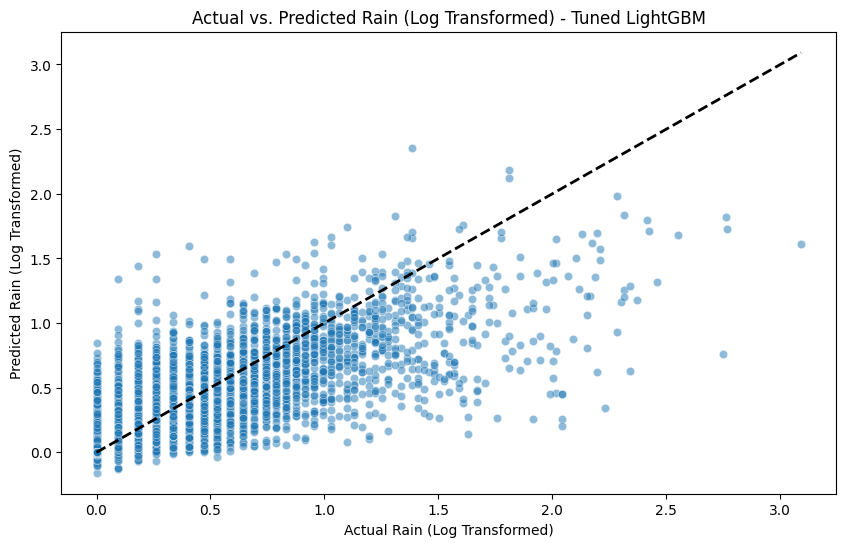

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=tuned_lgbm_model.predict(X_test), alpha=0.5) # Use the tuned_lgbm_model for predictions
plt.xlabel("Actual Rain (Log Transformed)")
plt.ylabel("Predicted Rain (Log Transformed)")
plt.title("Actual vs. Predicted Rain (Log Transformed) - Tuned LightGBM")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line for perfect prediction
plt.show()

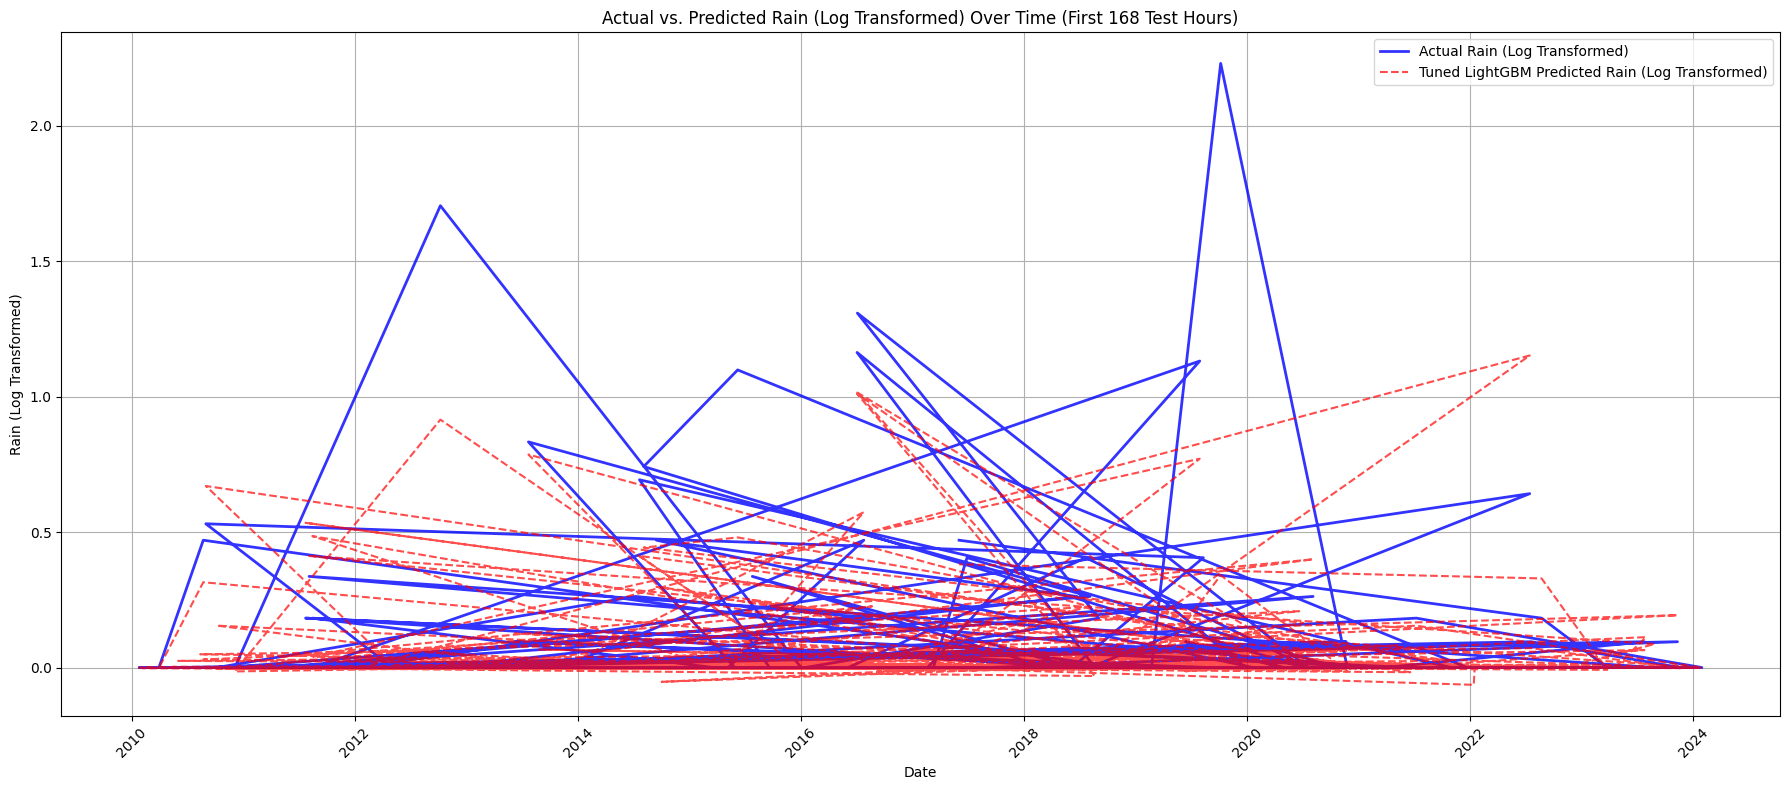

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Determine the sample size (e.g., 7 days of hourly data = 7 * 24 hours)
sample_size_hours = 7 * 24

# Get the dates corresponding to the test set using the index from y_test
# Make sure the 'date' column is still in the original df and aligned by index
test_dates = df.loc[y_test.index, 'date']

# Select a sample of actual and predicted values and corresponding dates
sample_y_test = y_test[:sample_size_hours]
sample_y_pred_tuned = tuned_lgbm_model.predict(X_test)[:sample_size_hours] # Use tuned_lgbm_model and slice predictions
sample_test_dates = test_dates[:sample_size_hours]

plt.figure(figsize=(18, 8))
plt.plot(sample_test_dates, sample_y_test, label='Actual Rain (Log Transformed)', color='blue', linewidth=2, alpha=0.8)
plt.plot(sample_test_dates, sample_y_pred_tuned, label=f'Tuned LightGBM Predicted Rain (Log Transformed)', linestyle='--', color='red', alpha=0.7) # Update label

plt.title(f'Actual vs. Predicted Rain (Log Transformed) Over Time (First {sample_size_hours} Test Hours)')
plt.xlabel('Date')
plt.ylabel('Rain (Log Transformed)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()